In [1]:
import os

In [2]:
os.chdir('D:\\idea projects\\pycharm projects\\ature\\')
from commons.IMAGE import Image

[Log] Loading file ### wide_image_03.mat
[Log] Loading filter kernel bank.
[Warn] Cannot load gabor kernel from kern.pkl. Creating new and dumping.
[Log] Applying Bilateral filter.
[Log] Applying Gabor filter.


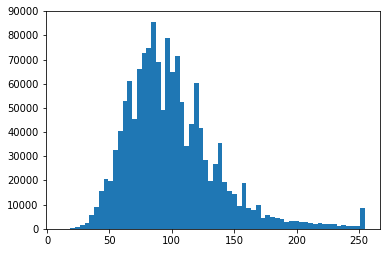

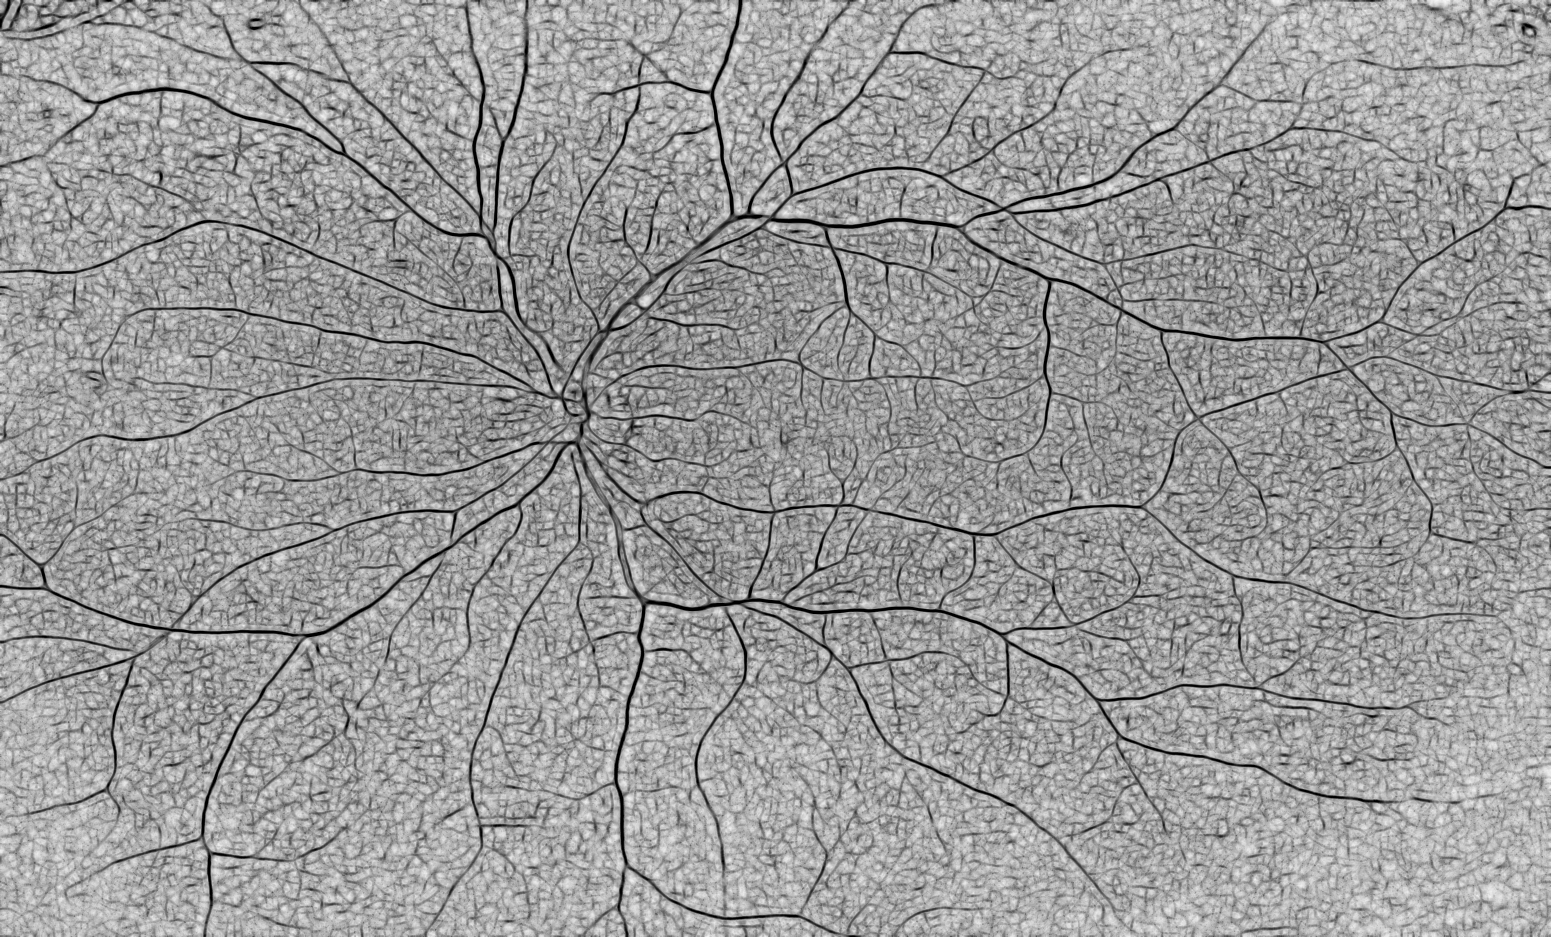

In [3]:
img = Image('wide_image_03.mat')
# img.show_image(image_array=img.img_array)
img.load_kernel_bank()
img.apply_bilateral(img.img_array[:, :, 1])
# img.show_image(img.img_bilateral)
img_temp = img.img_array[:, :, 1] - img.img_bilateral
img.apply_gabor(arr=img_temp, filter_bank=img.kernel_bank)
img.histogram(img.img_gabor)
# img.img_gabor[img.img_gabor<250] = 0
img.from_array(255-img.img_gabor)
# img.show_av_graph(mat_file=img.mat, image_arr=img.img_gabor, av_only=False)